In [3]:
from tensorflow.keras.utils import register_keras_serializable
import tensorflow as tf

# Register the sampling function
@register_keras_serializable()
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon


Encoder and Decoder loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


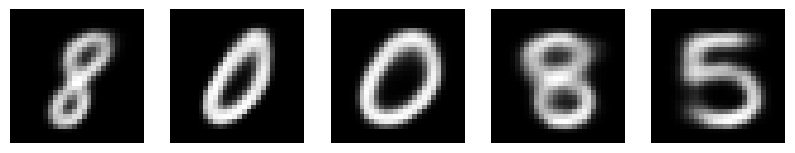

In [6]:
# =========================
# 1. Load Encoder & Decoder
# =========================
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load saved models (use the format you saved: .h5 or .keras)
encoder_loaded = load_model("cvae_encoder.h5")
decoder_loaded = load_model("cvae_decoder.h5")

print("Encoder and Decoder loaded successfully!")

# =========================
# 2. Function to generate a number sequence
# =========================
def generate_number(decoder, number_str, latent_dim=2):
    """
    Generate an image sequence for a number string, e.g., "34528".
    Each digit is generated separately in random handwriting style.
    """
    n = len(number_str)
    plt.figure(figsize=(n*2, 2))

    for i, char in enumerate(number_str):
        digit = int(char)

        # One-hot encode the digit
        label = np.zeros((1, 10))
        label[0, digit] = 1.0

        # Sample a random latent vector
        z_sample = np.random.normal(size=(1, latent_dim))

        # Generate the digit image
        x_decoded = decoder.predict([z_sample, label])
        digit_img = x_decoded[0].reshape(28, 28)

        # Plot
        plt.subplot(1, n, i+1)
        plt.imshow(digit_img, cmap="gray")
        plt.axis("off")

    plt.show()

# =========================
# 3. Generate example number
# =========================
generate_number(decoder_loaded, "80085")
